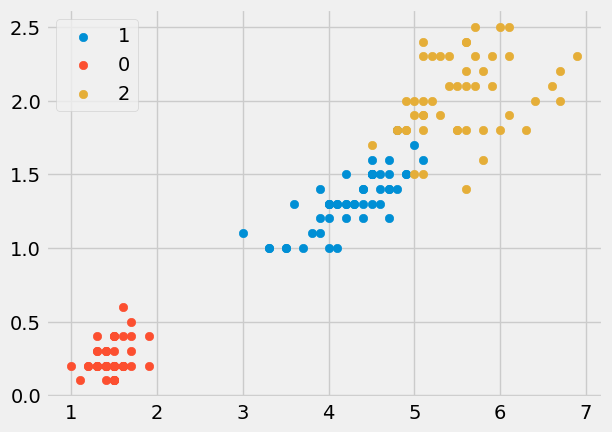

Accuracy: 93.33%


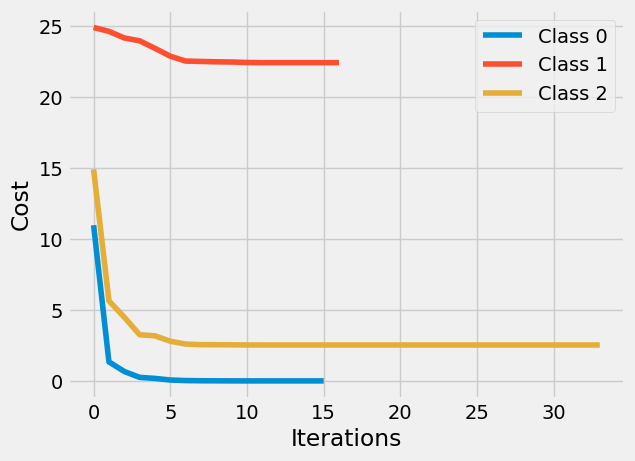

In [100]:
import numpy as np
import pandas as pd
from projects.logistic import logisticRegression
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

# 加载数据并打乱
data = pd.read_csv("./ML_data/iris.csv")
data = data.sample(frac=1, random_state=42).reset_index(drop=True)  # 打乱数据
data["class"] = data["class"].astype("category").cat.codes  # 标签转0,1,2

# 可视化（可选）
data_types = data["class"].unique()
x_axis = "petal_length"
y_axis = "petal_width"
for data_type in data_types:
    plt.scatter(
        data[x_axis][data["class"] == data_type],
        data[y_axis][data["class"] == data_type],
        label=data_type,
    )
plt.legend()
plt.show()

# 数据分割
data_num = int(data.shape[0] * 0.8)
x_train = data[[x_axis, y_axis]][:data_num].values
y_train = data["class"][:data_num].values.reshape(-1, 1)
x_test = data[[x_axis, y_axis]][data_num:].values
y_test = data["class"][data_num:].values.reshape(-1, 1)

# 训练模型
models = logisticRegression(x_train, y_train, normalize_data=True)  # 启用标准化
theta, cost_list = models.train(2000)

# 评估
precision = models.predict(x_test)
accuracy = np.mean(precision.flatten() == y_test.flatten())
print(f"Accuracy: {accuracy*100:.2f}%")

# 绘制损失曲线（可选）
for i, costs in enumerate(cost_list):
    plt.plot(costs, label=f"Class {i}")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()


In [103]:
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 93.33%


In [114]:
precision = models.predict(x_test[:10])

array([[1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [2],
       [2],
       [0],
       [1],
       [2],
       [2],
       [0],
       [2],
       [0],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [0],
       [1],
       [2],
       [0],
       [1],
       [2]], dtype=int8)